In [28]:
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    AutoConfig,
    TextClassificationPipeline,
)
import pandas as pd
from engine.ner_detector import text_preprocess

In [29]:
MODEL_ID = "nghuyong/ernie-2.0-base-en"
MODEL_PATH = "output/Mikolaj-notworking/model.safetensors"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

In [30]:
import torch
def get_device():
    if torch.cuda.is_available():
        print("CUDA is available. Using GPU.")
        return "cuda"
    else:
        print("CUDA not available. Using CPU.")
        return "cpu"

In [31]:
config = AutoConfig.from_pretrained(MODEL_ID)
device = get_device()
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_PATH, config=config
)
model.eval()
pipeline = TextClassificationPipeline(
    model=model, tokenizer=tokenizer, top_k=2, device=device
)

CUDA not available. Using CPU.


In [32]:
%%capture
if(device == "cuda"):
    model.cuda()
else:
    model.cpu()

In [33]:
from engine.ner_detector import tokenize_evaluate_and_detect_NERs,generate_aggregates

10it [00:06,  1.44it/s]



 INVALID DOC!!! stopped
EddieVanHalenDiesofCancerat65
eddievanhale##ndiesofcancerat
Eddie Van Halen Dies of Cancer at 65

 INVALID DOC!!! stopped
HavethePublicHealthRestrictionsGoneTooFarforCOVID-19?
havethepublichealthrestrictionsgonetoofarforco##vid-19
Have the Public Health Restrictions Gone Too Far for COVID-19?

 INVALID DOC!!! stopped
MyexperiencebattlingCOVID-19-MedicalNewsToday
myexperiencebattlingco##vid-19-medicalnewstoday
My experience battling COVID-19 - Medical News Today

 INVALID DOC!!! stopped
U.S.GovernmenttoIncreasePPEShipmentstoNursingHomes
u.s.governmenttoincreasepp##eshipmentstonursinghomes
U.S. Government to Increase PPE Shipments to Nursing Homes

 INVALID DOC!!! stopped
FrequentlyAskedQuestionsaboutHandHygieneforHealthcarePersonnelRespondingtoCOVID-2019
frequentlyaskedquestionsabouthandhygieneforhealthcarepersonnelrespondingtoco##vid-2019
Frequently Asked Questions about Hand Hygiene for Healthcare Personnel Responding to COVID-2019

 INVALID DOC!!! stopped
Nov

0it [00:00, ?it/s]


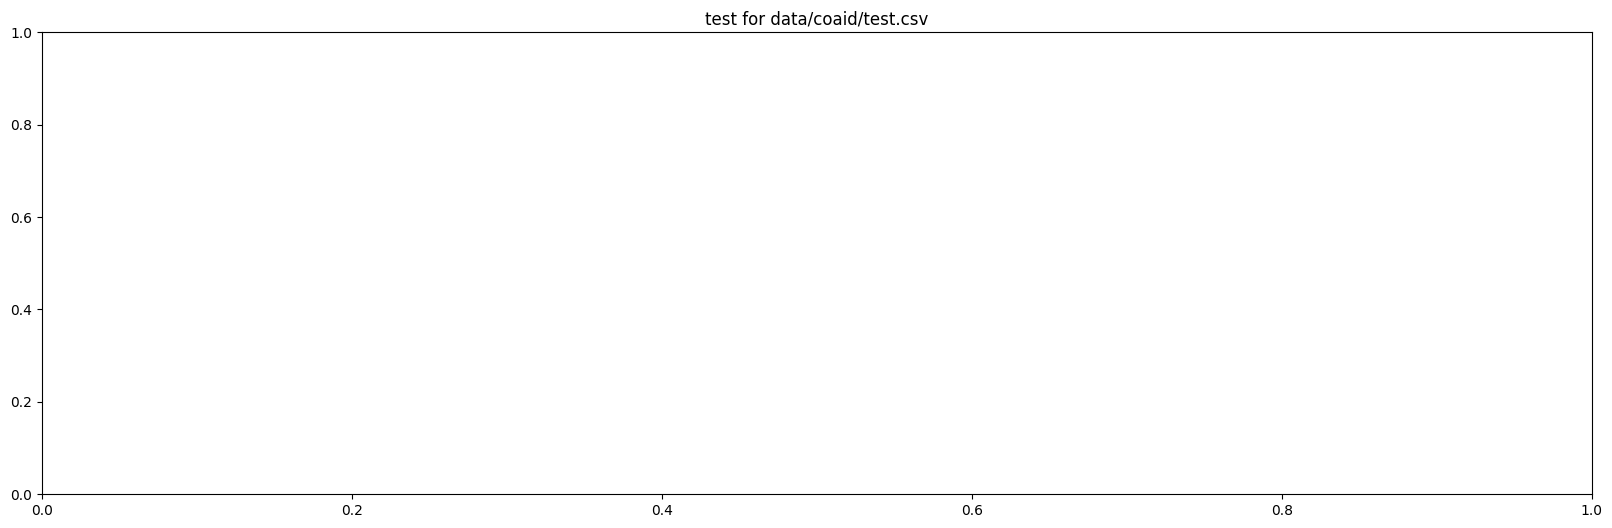

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

limit_data = 10


data_names = ["coaid"]

results_for_data_filtered = {}

for data_name in data_names:

    file = f"data/{data_name}/test.csv"
    test = pd.read_csv(file)
    test = test["text"].tolist()
    #temporatry data bottleneck
    if limit_data:
        test = test[:limit_data]
    token_exp_NERs = tokenize_evaluate_and_detect_NERs(pipeline,test)
    results_for_data_filtered[data_name] = token_exp_NERs
    all_ner_types = set()

    for _,_,ner in token_exp_NERs:
            all_ner_types.add(ner)
            
    exps = {}
    for ner_type in all_ner_types:
        exps[ner_type] = []



    for token,exp,ner in token_exp_NERs:
        exps[ner].append(exp)


    plt.figure(figsize=(20,6))
    sns.boxplot(exps)
    plt.title(f"test for {file}")
    plt.show()